In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7,
                random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels) # 지나친 세분화 군집        

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [4]:
meanshift= MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels) 

array([0, 1, 2], dtype=int64)

- estimate_bandwith()

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
bandwidth # 최적의 bandwidth(대역폭)

1.8158484154517098

In [21]:
import pandas as pd

clusterDF = pd.DataFrame(X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

In [22]:
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

In [23]:
cluster_labels

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1], dtype=int64)

In [16]:
import matplotlib.pyplot  as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
clusterDF

,ftr1,ftr2,target,meanshift_label
0,-1.671737,3.534007,2,2
1,0.732732,4.413232,0,0
2,1.084733,4.568501,0,0
3,-1.458497,3.325950,2,2
4,1.185037,5.232257,0,0
...,...,...,...,...
195,2.843913,0.141712,1,1
196,-2.005712,4.079568,2,2
197,2.692393,1.119716,1,1
198,1.195417,3.705920,0,0


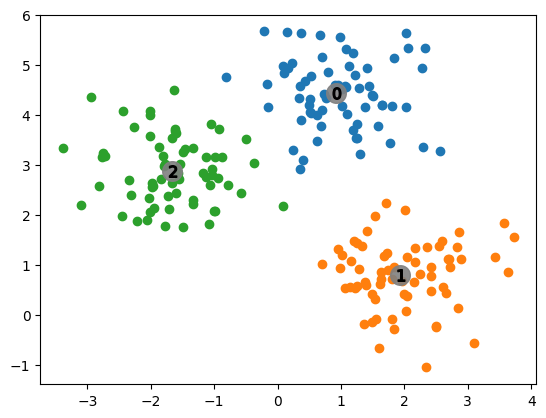

In [17]:
unique_labels = np.unique(cluster_labels)
centers = meanshift.cluster_centers_

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'])
    plt.scatter(x= center_x_y[0], y=center_x_y[1], s=200, color='gray',alpha=0.9)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
               marker = '$%d$' % label)

In [20]:
clusterDF.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64